In [1]:
import keras

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

Ograniczamy się do 10 000 najczęściej występujących słów.

In [5]:
max([max(sequence) for sequence in train_data])

9999

Odkodowanie recenzji.

In [6]:
# Słownik word_index przypisuje słowom wartości indeksów.
word_index = imdb.get_word_index()
# Odwracajac go, możemy przypisać indeksy do słów.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Kod dekodujący recenzję. Zauważ, że indeksy są przesunięte o 3, ponieważ pod indeksami o numerach 0, 1 i 2  
# znajdują się indeksy symbolizujące „wypełnienie”, „początek sekwencji” i „nieznane słowo”.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Tworzy macierz wypełnioną zerami o kształcie (len(sequences), dimension).
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Pod wybranymi indeksami umieszcza wartość 1.
    return results

# Zbiór treningowy w postaci wektora.
x_train = vectorize_sequences(train_data)
# Zbiór testowy w postaci wektora.
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# Zamiana etykiet na wektory.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

C:\Users\mrluk\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Walidacja modelu


In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.4970 - binary_accuracy: 0.7923 - val_loss: 0.3886 - val_binary_accuracy: 0.8514
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2934 - binary_accuracy: 0.9040 - val_loss: 0.3255 - val_binary_accuracy: 0.8667
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2157 - binary_accuracy: 0.9281 - val_loss: 0.2799 - val_binary_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1713 - binary_accuracy: 0.9434 - val_loss: 0.2853 - val_binary_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1383 - binary_accuracy: 0.9555 - val_loss: 0.2866 - val_binary_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1153 - binary_accuracy: 0.9639 - val_loss: 0.2995 - val_binary_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - los

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

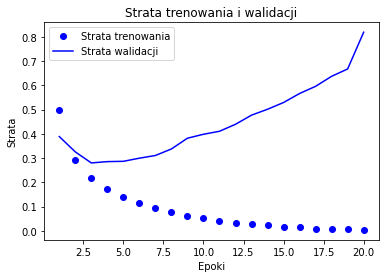

In [18]:
import matplotlib.pyplot as plt


acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Parametr bo definiuje linię przerywaną w postaci niebieskich kropek.
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
# Parametr b definiuje ciągłą niebieską linię.
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()

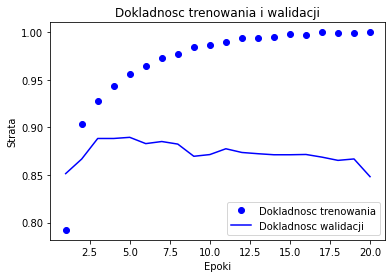

In [19]:
plt.clf()   # Czyszczenie rysunku.
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()

Jak widać, strata trenowania spada z każdą kolejną epoką, a dokładność trenowania wzrasta. Tego oczekujemy od optymalizacji algorytmem spadku gradientu — wartość, którą staramy się minimalizować, powinna maleć w każdej kolejnej iteracji, ale w czwartej epoce strata walidacji i dokładność walidacji rosną. Model sprawdzający się lepiej na treningowym zbiorze danych wcale nie musi sprawdzać się lepiej podczas przetwarzania nowych danych. W praktyce jest to przykład nadmiernego dopasowania — po drugiej epoce model jest zbytnio optymalizowany na treningowym zbiorze danych i uczy się konkretnej reprezentacji treningowego zbioru danych, a nie ogólnej wizji sprawdzającej się również poza treningowym zbiorem danych.

Przeprowadźmy trenowanie nowej sieci od podstaw (zróbmy to przez cztery epoki), a następnie dokonajmy ewaluacji na podstawie testowego zbioru danych.



In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 23ms/step - loss: 0.4662 - accuracy: 0.8215
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2683 - accuracy: 0.9077
Epoch 3/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2053 - accuracy: 0.9281
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2872 - accuracy: 0.8858


In [21]:
results

[0.28716447949409485, 0.8858000040054321]

To dość naiwne rozwiązanie pozwoliło uzyskać dokładność na poziomie 88%. Dopracowane modele powinny zbliżyć się do 95%.

## Przewidywanie

In [22]:
model.predict(x_test)

array([[0.18879214],
       [0.9992009 ],
       [0.8800952 ],
       ...,
       [0.14408773],
       [0.09507251],
       [0.61361104]], dtype=float32)